<a href="https://colab.research.google.com/github/kneecat/machine-learning/blob/master/0~9%E3%81%AE%E5%88%A4%E5%88%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.preprocessing import image
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
 #使うデータセットをダウンロードする
  
from keras.datasets import mnist

(X_train , Y_train ), (X_test, Y_test) = mnist.load_data()

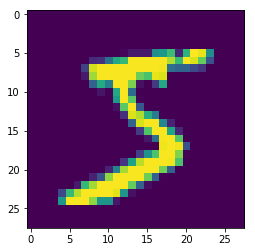

5
----------------------------------------------------------------------------------------------------


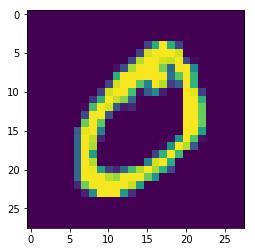

0
----------------------------------------------------------------------------------------------------


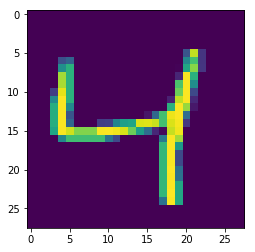

4
----------------------------------------------------------------------------------------------------


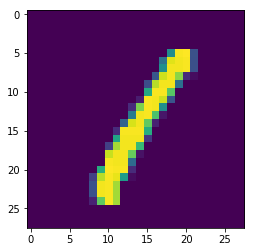

1
----------------------------------------------------------------------------------------------------


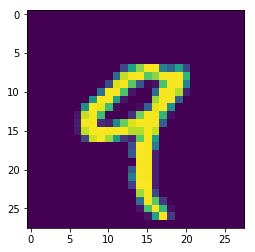

9
----------------------------------------------------------------------------------------------------


In [0]:
#こんなかんじのデータセットを使って学習させる

%matplotlib inline
for i in range(5): 
  plt.imshow(X_train[i])
  plt.show()
  print(Y_train[i])
  print("-"*100)

In [0]:
#kerasを用いて学習させる（４分くらいかかる）

X_train = X_train.reshape(60000, 28, 28, 1)
X_train = X_train / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["acc"])

history = model.fit(X_train, Y_train, epochs=5, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 46s 1ms/sample - loss: 0.1783 - acc: 0.9453 - val_loss: 0.0701 - val_acc: 0.9794
Epoch 2/5
42000/42000 [==============================] - 45s 1ms/sample - loss: 0.0554 - acc: 0.9837 - val_loss: 0.0699 - val_acc: 0.9801
Epoch 3/5
42000/42000 [==============================] - 44s 1ms/sample - loss: 0.0363 - acc: 0.9895 - val_loss: 0.0606 - val_acc: 0.9836
Epoch 4/5
42000/42000 [==============================] - 45s 1ms/sample - loss: 0.0251 - acc: 0.9929 - val_loss: 0.0825 - val_acc: 0.9821
Epoch 5/5
42000/42000 [==============================] - 45s 1ms/sample - loss: 0.0175 - acc: 0.9951 - val_loss: 0.0670 - val_acc: 0.9846


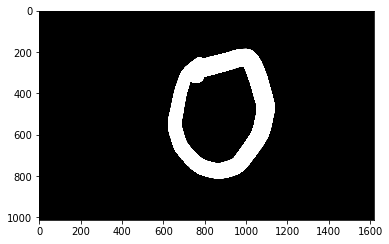

----------------------------------------------------------------------------------------------------


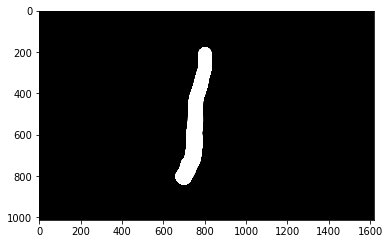

----------------------------------------------------------------------------------------------------


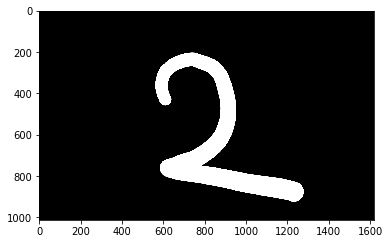

----------------------------------------------------------------------------------------------------


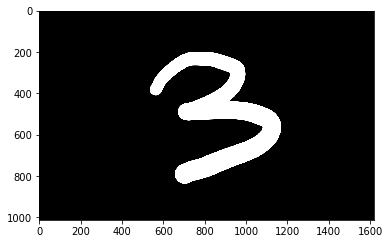

----------------------------------------------------------------------------------------------------


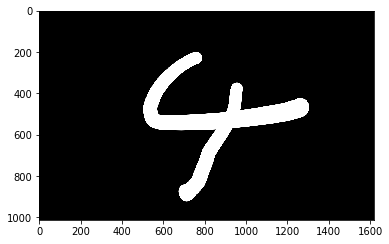

----------------------------------------------------------------------------------------------------


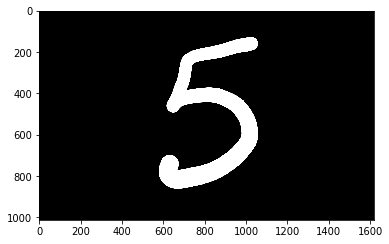

----------------------------------------------------------------------------------------------------


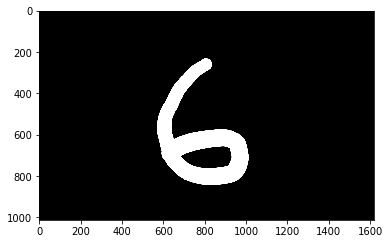

----------------------------------------------------------------------------------------------------


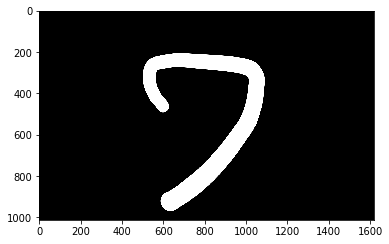

----------------------------------------------------------------------------------------------------


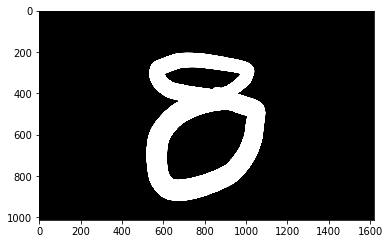

----------------------------------------------------------------------------------------------------


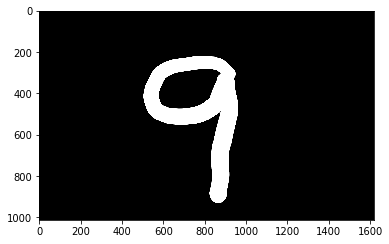

----------------------------------------------------------------------------------------------------


In [0]:
#自分が書いた手書き文字はこんなの

num_dir = os.path.join("/tmp/")
num_files = ["0.png","1.png","2.png","3.png","4.png","5.png","6.png","7.png","8.png","9.png"]

new_num = [os.path.join(num_dir, fname)
              for fname in num_files]

for img_path in new_num:
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.show()
  print("-"*100)

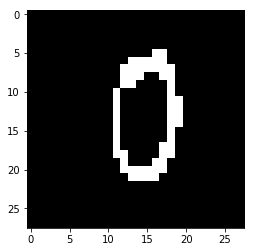

こいつは0です
正解！！
----------------------------------------------------------------------------------------------------


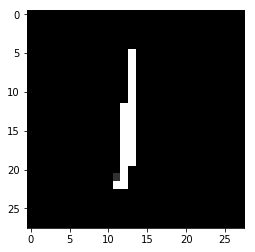

こいつは1です
正解！！
----------------------------------------------------------------------------------------------------


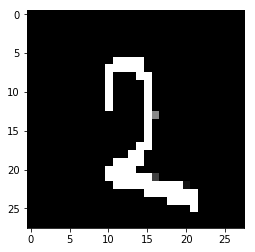

こいつは2です
正解！！
----------------------------------------------------------------------------------------------------


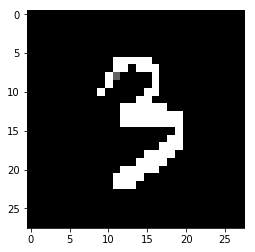

こいつは4です
間違い！！
----------------------------------------------------------------------------------------------------


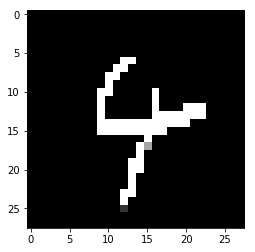

こいつは4です
正解！！
----------------------------------------------------------------------------------------------------


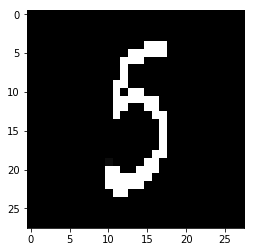

こいつは1です
間違い！！
----------------------------------------------------------------------------------------------------


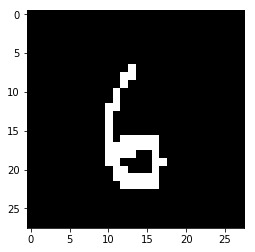

こいつは6です
正解！！
----------------------------------------------------------------------------------------------------


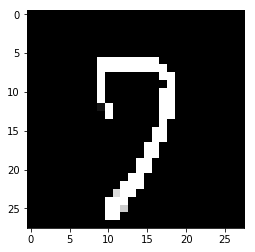

こいつは7です
正解！！
----------------------------------------------------------------------------------------------------


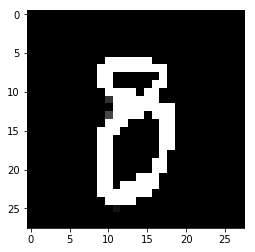

こいつは8です
正解！！
----------------------------------------------------------------------------------------------------


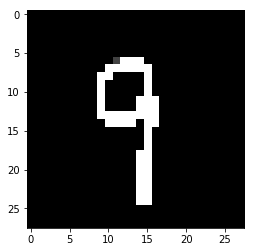

こいつは9です
正解！！
----------------------------------------------------------------------------------------------------


In [0]:
#判定してもらう

for i in range(len(new_num)):
  img = Image.open(new_num[i])
  img = img.resize((28,28))
  img = np.array(img)
  plt.imshow(img)
  plt.show()
  
  new_img = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
  x = image.img_to_array(new_img)
  x = np.expand_dims(x, axis=0)
  classes = model.predict(x)
  answer = np.argmax(classes)
  print("こいつは" + str(answer) + "です")
  if "/tmp/"+str(answer)+".png" == new_num[i]:
    print("正解！！")
  else:
    print("間違い！！")
  print("-"*100)

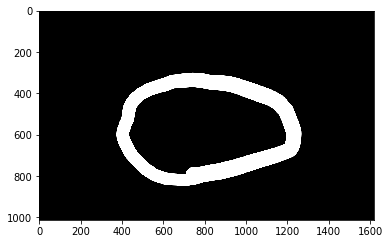

----------------------------------------------------------------------------------------------------


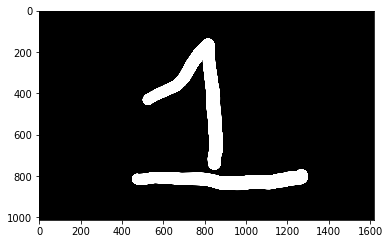

----------------------------------------------------------------------------------------------------


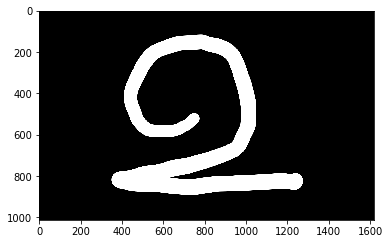

----------------------------------------------------------------------------------------------------


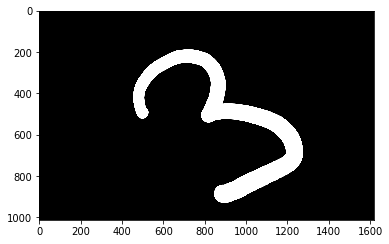

----------------------------------------------------------------------------------------------------


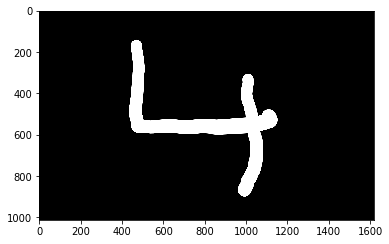

----------------------------------------------------------------------------------------------------


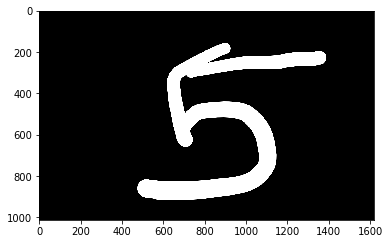

----------------------------------------------------------------------------------------------------


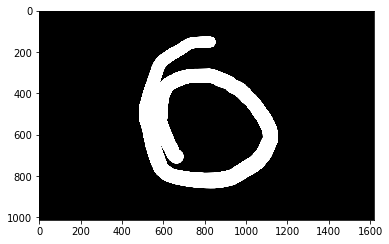

----------------------------------------------------------------------------------------------------


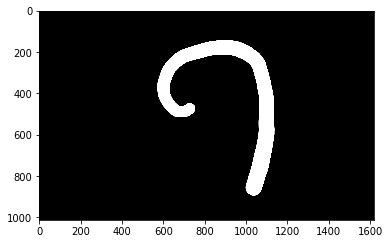

----------------------------------------------------------------------------------------------------


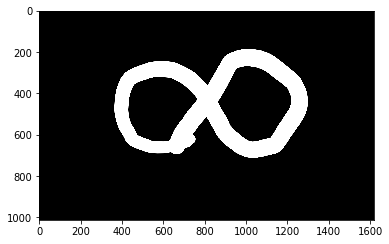

----------------------------------------------------------------------------------------------------


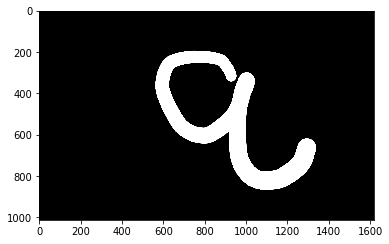

----------------------------------------------------------------------------------------------------


In [0]:
#変なのも書いてみる

new_num_dir = os.path.join("/tmp/")
new_num_files = ["00.png","11.png","22.png","33.png","44.png","55.png","66.png","77.png","88.png","99.png"]

new_new_num = [os.path.join(new_num_dir, fname)
              for fname in new_num_files]

for img_path in new_new_num:
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.show()
  print("-"*100)

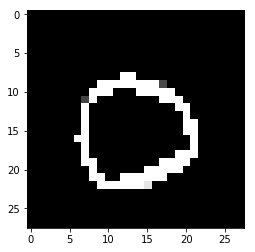

こいつは0です
正解！！
----------------------------------------------------------------------------------------------------


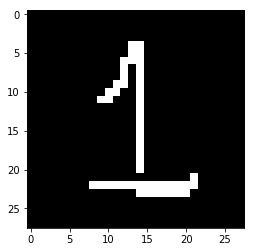

こいつは1です
正解！！
----------------------------------------------------------------------------------------------------


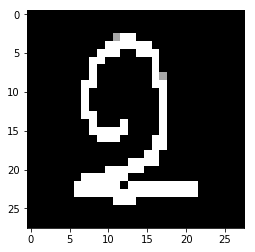

こいつは2です
正解！！
----------------------------------------------------------------------------------------------------


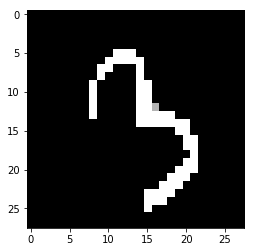

こいつは4です
間違い！！
----------------------------------------------------------------------------------------------------


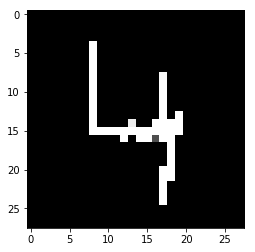

こいつは4です
正解！！
----------------------------------------------------------------------------------------------------


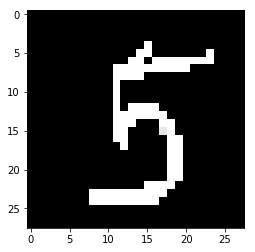

こいつは5です
正解！！
----------------------------------------------------------------------------------------------------


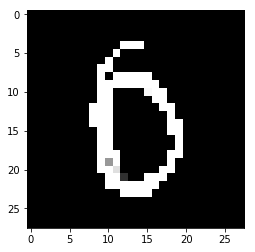

こいつは0です
間違い！！
----------------------------------------------------------------------------------------------------


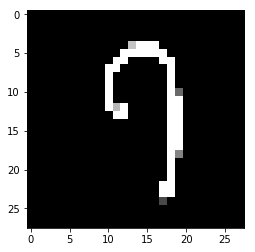

こいつは4です
間違い！！
----------------------------------------------------------------------------------------------------


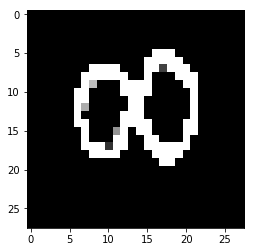

こいつは0です
間違い！！
----------------------------------------------------------------------------------------------------


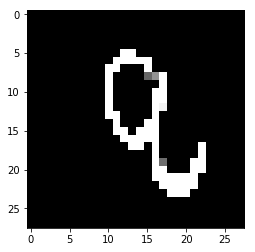

こいつは4です
間違い！！
----------------------------------------------------------------------------------------------------


In [0]:
#判定してもらう

for i in range(len(new_new_num)):
  img = Image.open(new_new_num[i])
  img = img.resize((28,28))
  img = np.array(img)
  plt.imshow(img)
  plt.show()
  
  new_img = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
  x = image.img_to_array(new_img)
  x = np.expand_dims(x, axis=0)
  classes = model.predict(x)
  answer = np.argmax(classes)
  print("こいつは" + str(answer) + "です")
  if "/tmp/"+str(answer)*2+".png" == new_new_num[i]:
    print("正解！！")
  else:
    print("間違い！！")
  print("-"*100)